In [1]:
import os
Directory = os.getcwd()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:

from os import listdir
from os.path import isfile, join


print(os.getcwd())

# RAW DATA MUST BE IN RAW DATA FOLDER
mypath = Directory + '\\Raw Data'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

#print(onlyfiles)

c:\Users\Luke\OneDrive - UW\College\TCSS Classes\TCSS 435 Artificial Intelligence And Knowledge Acquisition\Complete Data


In [81]:
#Convert raw data from attribute files into Averages per Generation Over Trials CSV
def convert_raw_data_to_averages(attributeFileName):
    degrees = [60, 120, 180, 240, 300, 360]

    compiledAverages = []

    # Read in all files and colculate averages for each table
    for degree in degrees:  
        fileName = attributeFileName + "_tcss435-gold1-" + str(degree)
        print('\n')
        print("Looking for file substring: " + fileName)
        foundFile = False

        for file in onlyfiles:
            #print("Checking file: " + file)
            if (fileName in file):
                fileName = file
                foundFile = True
                print("File found: " + fileName)
                print('\n')
                break
        
        if (not foundFile):
            print("File not found, substring for file lookup: " + fileName)
            exit(1)
    
        # If file found, continue parsing
        df = pd.read_csv(mypath + '\\' + fileName)

        trialNumbers = df.columns.tolist()
    
        data = df.to_numpy()

        # Get average of each generation
        averages = []
        for i in range(1, len(data)):
            
            total = 1
            correctAngleCounter = 0
                
            for j in range(0, len(trialNumbers) - 1):
                angleAttr = data[0][j]
                #print(angleAttr)
                if (str(degree) in angleAttr):
                    correctAngleCounter += 1
                    #print(data[i][j])
                    total += int(data[i][j])
            #print(correctAngleCounter)
            average = total / correctAngleCounter
            averages.append(average)
            
        compiledAverages.append(averages)
        
    #print(compiledAverages)

    # Write averages to CSV
    # avgFrame = pd.DataFrame(compiledAverages)

    avgFrame = pd.DataFrame({'60': compiledAverages[0], '120': compiledAverages[1], '180': compiledAverages[2], '240': compiledAverages[3], '300': compiledAverages[4], '360': compiledAverages[5]})
    #print(avgFrame)

    fileOutput = attributeFileName + "_averages.csv"
    avgFrame.to_csv(fileOutput, index=False)
    return fileOutput



In [82]:
def plot_data(csv_file, title, y_label):
    print('Generating Graph')
    # Read the data from the CSV file
    df = pd.read_csv(csv_file)
#print(df.to_string())
    # Get the degree variables and data columns
    degrees = df.columns.tolist()
    #print(degrees)
    data = df.to_numpy()
    #print(data)
    # Define colors for each degree variable
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    #print(len(data[:, 0]))
    count_array = list(range(0, len(data[:, 0])))
    
    #print(count_array)
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot each data set with a different color based on the degree variable
    for i in range(0, len(degrees)):
        plt.plot(count_array, data[:, i], label=f'{degrees[i]}', color=colors[i])

    # Set the X and Y labels and title
    plt.xlabel('Average per Generation')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()  # Show the legend with labels
    plt.grid()  # Show grid lines
    plt.show()



Looking for file substring: totalCaloriesConsumedAsPrey_tcss435-gold1-60
File found: totalCaloriesConsumedAsPrey_tcss435-gold1-60-1.csv




Looking for file substring: totalCaloriesConsumedAsPrey_tcss435-gold1-120
File found: totalCaloriesConsumedAsPrey_tcss435-gold1-120-1.csv




Looking for file substring: totalCaloriesConsumedAsPrey_tcss435-gold1-180
File found: totalCaloriesConsumedAsPrey_tcss435-gold1-180-1.csv




Looking for file substring: totalCaloriesConsumedAsPrey_tcss435-gold1-240
File found: totalCaloriesConsumedAsPrey_tcss435-gold1-240-1.csv




Looking for file substring: totalCaloriesConsumedAsPrey_tcss435-gold1-300
File found: totalCaloriesConsumedAsPrey_tcss435-gold1-300-1.csv




Looking for file substring: totalCaloriesConsumedAsPrey_tcss435-gold1-360
File found: totalCaloriesConsumedAsPrey_tcss435-gold1-360-1.csv


Generating Graph


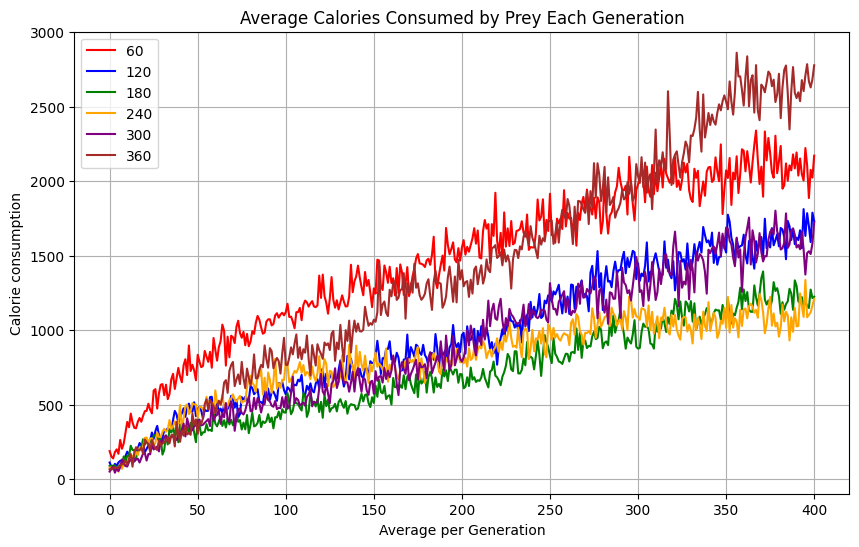



Looking for file substring: totalPreyHuntedCount_tcss435-gold1-60
File found: totalPreyHuntedCount_tcss435-gold1-60-1.csv




Looking for file substring: totalPreyHuntedCount_tcss435-gold1-120
File found: totalPreyHuntedCount_tcss435-gold1-120-1.csv




Looking for file substring: totalPreyHuntedCount_tcss435-gold1-180
File found: totalPreyHuntedCount_tcss435-gold1-180-1.csv




Looking for file substring: totalPreyHuntedCount_tcss435-gold1-240
File found: totalPreyHuntedCount_tcss435-gold1-240-1.csv




Looking for file substring: totalPreyHuntedCount_tcss435-gold1-300
File found: totalPreyHuntedCount_tcss435-gold1-300-1.csv




Looking for file substring: totalPreyHuntedCount_tcss435-gold1-360
File found: totalPreyHuntedCount_tcss435-gold1-360-1.csv


Generating Graph


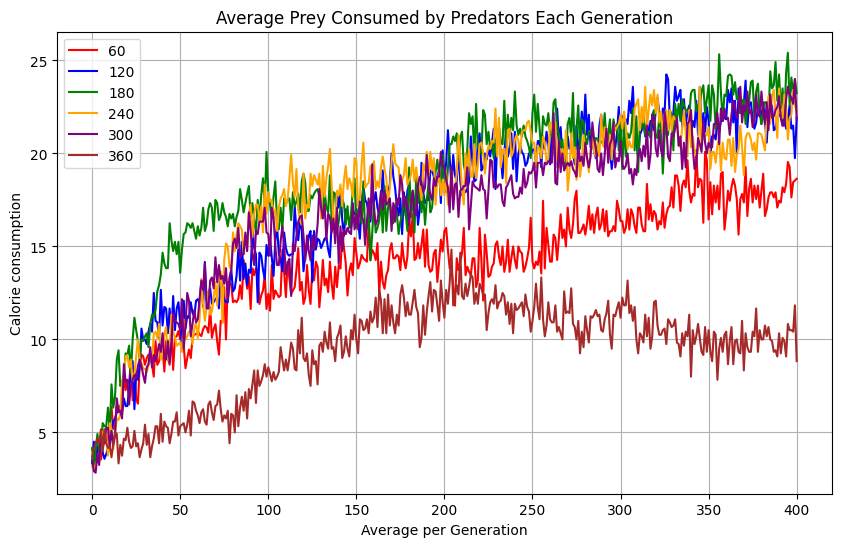

In [83]:
if __name__ == "__main__":
    
    averagesFile1 = convert_raw_data_to_averages("totalCaloriesConsumedAsPrey")
    plot_data(averagesFile1, "Average Calories Consumed by Prey Each Generation", "Calorie consumption")

    averagesFile2 = convert_raw_data_to_averages("totalPreyHuntedCount")
    plot_data(averagesFile2, "Average Prey Consumed by Predators Each Generation", "Calorie consumption")